Definição: o processo de revisar e limpar dados para obtermos insights (como estatística descritiva e correlação) e gerar hipóteses.

## Conhecer o dataset

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data\ds_salaries_clean.csv")

In [2]:
df.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [ ]:
df.info() # non-nulls, object types
df['column'].value_counts() # value counts
df['column'].describe() # statistics from this variable
df.describe() # statistics for each numerical column

In [ ]:
# visualização: seaborn e matplotlib

sns.histplot(data=df, x='column', binwidth=.1)
plt.show()

### Data validation

- Verificar se õs dados estão dentro dos intervalos esperados.

In [ ]:
df.info() # função que dá os datatypes e contagem de valores não nulos de cada coluna
df.dtypes # atribuito que dá apenas os datatypes das colunas

# editing datatypes:
df['column'] = df['column'].astype(int)

In [ ]:
# validando dados categóricos
df['column'].unique()
df['column'].isin(['value_1','value_2']) # series de bool; pode ser usado pra filtrar
~df['column'].isin(['value_1','value_2']) # '~' inverte True com False

In [ ]:
# validando dados numéricos:
df.select_dtypes("number") # filtra o df apenas para colunas numéricas
df['column'].min()
df['column'].max()

# boxplot:
sns.boxplot(data=df, x='column')
plt.show()

# multiplos boxplots (uma variável agrupada por uma outra variável categórica)
sns.boxplot(data=df, x='numeric_column', y='categorical_column')
plt.show()


### Data Sumarization

In [ ]:
df.groupby("categorical_column").mean() # pega a média de todas as colunas numéricas
# outras funções agregadoras: .sum(), .count(), .min(), .max(), .var(), .std()   e .agg()

# .agg() permite selecionar funções diferentes:
df.groupby("categorical_column").agg(["mean", "std"]) # lista: pega a média e o desvio pra cada variável numérica
df.groupby("categorical_column").agg({"column2": "count", "column3": "sum"}) # dict: chave determina a coluna e o valor determina a função
df.groupby("categorical_column").agg(mean_column2=("column2", "mean"),      # tuples: nome é o nome da coluna a ser criada, 
                                    std_column2=("column2", "std"),                   # primeiro argumento é a variável a ser tirada a métrica 
                                    median_column3=("column3", "median"))            # terceiro é a métrica a ser tirada
                                                                                      # lembrando que as linhas serão as categorias agrupadas

In [ ]:
# barplot: semelhante ao groupby, mostra média e barra de erro mostra std
sns.barplot(data=df, x='categorical_column', y='numerical_column')
plt.show()

## Tratamento

### Ausência de dados

- Remover os registros se eles representarem  ausencia maior igual a 5% em uma variável;
- Imputação: substituir por alguma estatística;
- Imputar por subgrupo: pegar a mediana de cada categoria de uma variável escolhida;


In [ ]:
print(df.isna().sum()) # soma os booleanos True de dados faltantes por coluna

In [ ]:
# dropar colunas:
limite = len(df) * 0.05 # pega somente o len vertical
cols_to_drop = df.columns[df.isna().sum() <= limite]
df = df.dropna(subset=cols_to_drop)

In [ ]:
# imputing:
cols_with_nas = df.columns[df.isna().sum() < 0]

for col in cols_with_nas:
    df[col].fillna(df[col].median()[0]) # pra que esse `[0]`?

In [ ]:
# imputing by subgroup:
median_dict = df.groupby("categorical_column")['variable'].median().to_dict()
    # dicionário com o nome da categoria: mediana de variable para cada categoria

df['variable'] = df['variable'].fillna(df['categorical_column'].map(median_dict))

### Dados Categóricos

In [3]:
print(df.select_dtypes("object").head()) # mostra somente as colunas com dtype = object

df['Designation'].value_counts() # frequencia absoluta  dos valores
df['Designation'].nunique() # soma de valores de freq = 1

                  Designation Experience Employment_Status Employee_Location  \
0              Data Scientist        Mid                FT                DE   
1  Machine Learning Scientist     Senior                FT                JP   
2           Big Data Engineer     Senior                FT                GB   
3        Product Data Analyst        Mid                FT                HN   
4   Machine Learning Engineer     Senior                FT                US   

  Company_Size  
0            L  
1            S  
2            M  
3            S  
4            L  


50

In [ ]:
# pandas.Series.str.contains(): # método que permite pesquisar numa coluna uma (ou mais) string
df['column'].str.contains("Conteúdo de string") # retorna bool

df['column'].str.contains("Palavra-chave 1|Palavra-chave 2") # equivalente a "Palavra-chave 1" ou "Palavra-chave 2"

In [4]:
# criando uma coluna de categorias:
# exemplo: temos uma coluna com o título de emprego, queremos categorizar criando uma coluna nova

job_categories = ["Data Science", "Data Analytics", "Data Engineer", "Machine Learning"] # valores de categoria a ir na coluna nova

# pesquisas
data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"

conditions = [
    (df['Designation'].str.contains(data_science)),
    (df['Designation'].str.contains(data_analyst)),
    (df['Designation'].str.contains(data_engineer)),
    (df['Designation'].str.contains(ml_engineer))
]


# nova coluna:
df["Job_category"] = np.select(conditions,
                                job_categories,
                                  default="Other") # se não encontrada a categoria que estipulamos, coloque o valor "Other"

# visualização:
df[["Designation", "Job_category"]].head()

,Designation,Job_category
0,Data Scientist,Data Science
1,Machine Learning Scientist,Machine Learning
2,Big Data Engineer,Data Engineer
3,Product Data Analyst,Data Analytics
4,Machine Learning Engineer,Machine Learning


### Dados Numéricos

In [ ]:
# transformar dtype de coluna numerica que ta como categórica:
df['column'].str.replace(".","") # remover os pontos (que separam os milhares da parte inteira do número)
df['column'].str.replace(",",".") # substitui virgula por ponto

df['column'] = df['column'].astype(float)

In [ ]:
# adicionando estatísticas ao dataframe:
# roteiro: agrupamos por categoria x -> selecionamos o dado y -> chamamos transform() -> aplicamos uma função lambda

df["desvio_padrao"] = df.groupby("x")["y"].transform(lambda x: x.std())
print(df[["x", "y"]].value_counts())

#### Outliers
- Def.: observação distante dos demais dados;
- Podem não representar os dados corretamente
- Puxam média e desvio
- Testes estatísticos e modelos de ML precisam de dados distribuidos.

In [19]:
print(df['Salary_USD'].describe()) # procurar estatísticas 1o e 3o quartil.
iqr = df['Salary_USD'].describe()['75%'] - df['Salary_USD'].describe()['25%']  # interquartile range: 3o - 1o 

# ou
iqr = df['Salary_USD'].quantile(0.75) - df['Salary_USD'].quantile(0.25)

upper_limit = df['Salary_USD'].describe()['75%'] + 1.5*iqr # limite superior: acima disso é outlier
lower_limit = df['Salary_USD'].describe()['25%'] - 1.5*iqr # limite inferior: abaixo disso é outlier

count       607.000000
mean     107225.836903
std       67752.393254
min        2730.000000
25%       59893.000000
50%       96982.000000
75%      143225.000000
max      572900.000000
Name: Salary_USD, dtype: float64


In [22]:
df[(df['Salary_USD']<lower_limit)|(df['Salary_USD']>upper_limit)] # visualizar outliers
df[(df['Salary_USD']>lower_limit)&(df['Salary_USD']<upper_limit)]  # filtrar outliers pra fora

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_category
25,2020,Director of Data Science,Executive,FT,US,L,100,310321.0,Other
33,2020,Research Scientist,Mid,FT,US,M,0,429675.0,Other
63,2020,Data Scientist,Senior,FT,US,L,100,393392.0,Data Science
97,2021,Financial Data Analyst,Mid,FT,US,L,100,429675.0,Data Analytics
157,2021,Applied Machine Learning Scientist,Mid,FT,US,L,50,403895.0,Machine Learning
225,2021,Principal Data Scientist,Executive,CT,US,S,100,397211.0,Data Science
252,2021,Principal Data Engineer,Executive,FT,US,L,100,572900.0,Data Engineer
482,2022,Data Engineer,Executive,FT,US,M,100,309366.0,Data Engineer
519,2022,Applied Data Scientist,Senior,FT,US,L,100,362837.0,Data Science
523,2022,Data Analytics Lead,Senior,FT,US,L,100,386708.0,Data Analytics


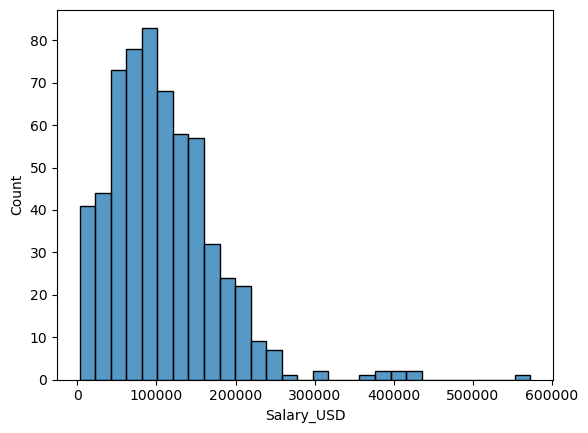

In [25]:
sns.histplot(data=df,x="Salary_USD")
plt.show()

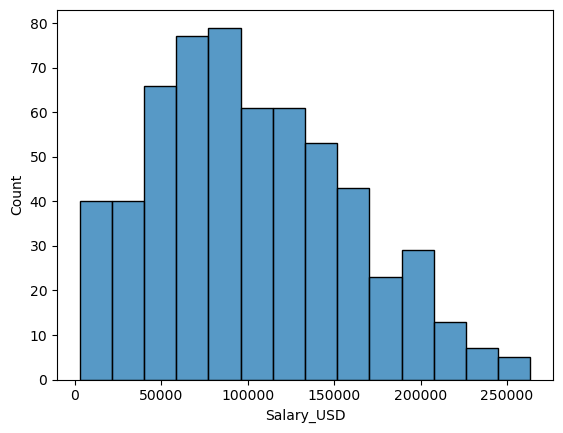

In [26]:
sns.histplot(data=df[(df['Salary_USD']>lower_limit)&(df['Salary_USD']<upper_limit)] ,x="Salary_USD")
plt.show()